In [2]:
# Install core packages
!pip install numpy pandas matplotlib scikit-learn opencv-python

# Install TensorFlow (for the deep learning model)
!pip install tensorflow

# Install MediaPipe (for hand tracking)
!pip install mediapipe

# (Optional) Restart the kernel after installation
from IPython.display import clear_output
clear_output()
print("Packages installed successfully! Restart the kernel if needed.")

Packages installed successfully! Restart the kernel if needed.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [5]:
# Load dataset function
def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    
    y_train = train_df['label'].values
    x_train = train_df.drop('label', axis=1).values
    
    y_test = test_df['label'].values
    x_test = test_df.drop('label', axis=1).values
    
    return (x_train, y_train), (x_test, y_test)

In [6]:
# Load and prepare data
train_path = 'sign_mnist_train.csv'
test_path = 'sign_mnist_test.csv'

(x_train, y_train), (x_test, y_test) = load_data(train_path, test_path)

In [7]:
# Preprocessing function
def preprocess_data(x, y):
    x = x.reshape(-1, 28, 28, 1) / 255.0
    y = to_categorical(y, num_classes=25)  # 24 letters + 1 for unknown
    return x, y

x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

In [8]:
# Model architecture
def create_model(input_shape=(28, 28, 1), num_classes=25):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = create_model()
model.summary()


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Training setup
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('sign_language_model.h5', save_best_only=True)
]

# %%
# Train the model
history = model.fit(x_train, y_train,
                   epochs=30,
                   batch_size=64,
                   validation_data=(x_test, y_test),
                   callbacks=callbacks)

Epoch 1/30
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2292 - loss: 2.5792

429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.2306 - loss: 2.5742 - val_accuracy: 0.7743 - val_loss: 0.7743
Epoch 2/30
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7418 - loss: 0.7682

429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7421 - loss: 0.7675 - val_accuracy: 0.8727 - val_loss: 0.4016
Epoch 3/30
426/429 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8513 - loss: 0.4336

429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8515 - loss: 0.4332 - val_accuracy: 0.8846 - val_loss: 0.3670
Epoch 4/30
425/429 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9009 - loss: 0.2905

429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9010 - loss: 0.2903 - val_accuracy: 0.9098 - val_loss: 0.2838
Epoch 5/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9258 - loss: 0.2107 - val_accuracy: 0.9083 - val_loss: 0.2937
Epoch 6/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9377 - loss: 0.1720

429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9377 - loss: 0.1719 - val_accuracy: 0.9219 - val_loss: 0.2645
Epoch 7/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9510 - loss: 0.1357 - val_accuracy: 0.9208 - val_loss: 0.2672
Epoch 8/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9562 - loss: 0.1234 - val_accuracy: 0.9183 - val_loss: 0.2753
Epoch 9/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9617 - loss: 0.1084 - val_accuracy: 0.9120 - val_loss: 0.3144
Epoch 10/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9679 - loss: 0.0918 - val_accuracy: 0.9162 - val_loss: 0.3112
Epoch 11/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9688 - loss: 0.0871 - val_accuracy: 0.9294 - val_loss: 0.2648


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9212 - loss: 0.2680   
Test accuracy: 0.9219


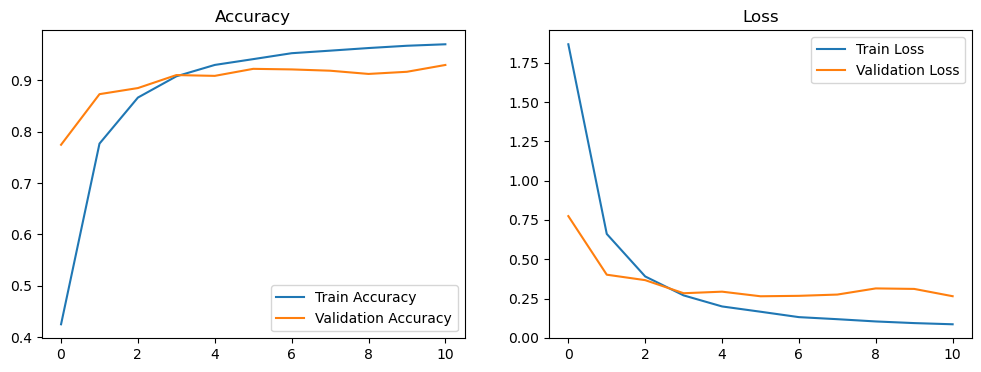

In [17]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [25]:
# Import required functions
from tensorflow.keras.models import load_model
import numpy as np
import os

# 1. Verify model exists and load it
if not os.path.exists('sign_language_model.h5'):
    raise FileNotFoundError("Model file not found. Please train the model first.")
else:
    best_model = load_model('sign_language_model.h5')
    print("✅ Model loaded successfully!")

# 2. Evaluate the model
if 'best_model' in locals() and 'x_test' in locals() and 'y_test' in locals():
    test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
    print(f"🔍 Evaluation Results:\nTest Accuracy: {test_acc:.2%}\nTest Loss: {test_loss:.4f}")
else:
    print("⚠️ Missing required variables for evaluation")

✅ Model loaded successfully!
🔍 Evaluation Results:
Test Accuracy: 92.19%
Test Loss: 0.2645


In [27]:
# 1. Load
best_model = load_model('sign_language_model.h5')

# 2. Evaluate
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {test_acc:.4f}")

# 3. Save
best_model.save('chichewa_sign_language.h5')

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9212 - loss: 0.2680    


Final Test Accuracy: 0.9219


In [29]:
# Character mapping
label_to_chichewa = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K',
    10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P',
    15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U',
    20: 'V', 21: 'W', 22: 'X', 23: 'Y', 24: ' '
}

chichewa_words = {
    'AMAMA': 'Amama',  # Mother
    'ABABA': 'Ababa',  # Father
    'ATATE': 'Atate',  # Father
    
}

In [31]:
# Initialize MediaPipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, 
                      max_num_hands=1, 
                      min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils


In [33]:
# Hand image preprocessing
def preprocess_hand_image(image, hand_landmarks, img_size=(28, 28)):
    h, w = image.shape[:2]
    x_coords = [landmark.x * w for landmark in hand_landmarks.landmark]
    y_coords = [landmark.y * h for landmark in hand_landmarks.landmark]
    
    x_min, x_max = int(min(x_coords)), int(max(x_coords))
    y_min, y_max = int(min(y_coords)), int(max(y_coords))
    
    padding = 20
    x_min = max(0, x_min - padding)
    x_max = min(w, x_max + padding)
    y_min = max(0, y_min - padding)
    y_max = min(h, y_max + padding)
    
    hand_img = image[y_min:y_max, x_min:x_max]
    hand_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
    hand_img = cv2.resize(hand_img, img_size)
    hand_img = hand_img.reshape(1, 28, 28, 1) / 255.0
    
    return hand_img

In [44]:
# Main recognition function
def recognize_sign_language():
    cap = cv2.VideoCapture(0)
    recognized_text = ""
    last_prediction = None
    prediction_streak = 0
    required_streak = 5
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.flip(frame, 1)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(rgb_frame)
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
                hand_img = preprocess_hand_image(frame, hand_landmarks)
                prediction = model.predict(hand_img)
                predicted_label = np.argmax(prediction)
                confidence = np.max(prediction)
                
                if predicted_label == last_prediction:
                    prediction_streak += 1
                else:
                    prediction_streak = 0
                    last_prediction = predicted_label
                
                if prediction_streak == required_streak and confidence > 0.7:
                    chichewa_char = label_to_chichewa.get(predicted_label, '?')
                    
                    if predicted_label == 24:
                        if recognized_text and recognized_text[-1] != ' ':
                            recognized_text += ' '
                    else:
                        recognized_text += chichewa_char
                    
                    prediction_streak = 0
                    last_prediction = None
        
        cv2.putText(frame, f"Chichewa: {recognized_text}", (10, 30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, "Show signs to camera. 'Space' to clear text.", (10, 70), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        
        cv2.imshow('Chichewa Sign Language Recognition', frame)
        
        key = cv2.waitKey(1)
        if key == ord(' '):
            recognized_text = ""
        elif key == 27:
            break
            
    cap.release()
    cv2.destroyAllWindows()

In [46]:
# Run the recognition system
recognize_sign_language()

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def recognize_sign_language_jupyter():
    cap = cv2.VideoCapture(0)
    recognized_text = ""
    last_prediction = None
    prediction_streak = 0
    required_streak = 5
    frame_count = 0
    max_frames = 300  # Adjust as needed

    plt.ion()  # Interactive mode ON for live update

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to read frame from camera.")
            break

        frame = cv2.flip(frame, 1)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(rgb_frame)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                hand_img = preprocess_hand_image(frame, hand_landmarks)
                try:
                    prediction = model.predict(hand_img)
                    predicted_label = np.argmax(prediction)
                    confidence = np.max(prediction)

                    if predicted_label == last_prediction:
                        prediction_streak += 1
                    else:
                        prediction_streak = 0
                        last_prediction = predicted_label

                    if prediction_streak == required_streak and confidence > 0.7:
                        chichewa_char = label_to_chichewa.get(predicted_label, '?')

                        if predicted_label == 24:
                            if recognized_text and recognized_text[-1] != ' ':
                                recognized_text += ' '
                        else:
                            recognized_text += chichewa_char

                        prediction_streak = 0
                        last_prediction = None
                except Exception as e:
                    print("Prediction error:", e)

        # Add display text
        cv2.putText(frame, f"Chichewa: {recognized_text}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, "Show signs to camera", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Display frame using matplotlib
        rgb_display = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        plt.imshow(rgb_display)
        plt.axis('off')
        display(plt.gcf())
        plt.pause(0.001)
        plt.clf()

        frame_count += 1
        if frame_count >= max_frames:
            print("Max frame limit reached. Stopping...")
            break

    cap.release()
    plt.ioff()
    plt.close()


In [50]:
recognize_sign_language_jupyter()

Failed to read frame from camera.


In [52]:
!pip install ipywebrtc ipywidgets

In [55]:
recognize_sign_language_jupyter()

Failed to read frame from camera.
